In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

from datetime import datetime, timedelta

import random

In [9]:
# 데이터 불러오기
plant1 = pd.read_csv('plant1_train_merge.csv')
plant2 = pd.read_csv('plant2_train_merge.csv')
test =  pd.read_csv('test.csv', index_col=0)

# 결측행 제거
plant1_notnull = plant1.dropna(how='any')
plant2_notnull = plant2.dropna(how='any')

In [10]:
# 1, 0 비율
print('loc1 value counts\n')
print(plant1['plant1_train.cond_loc1'].value_counts())
print(plant1_notnull['plant1_train.cond_loc1'].value_counts(),'\n\n')

print('loc2 value counts\n')
print(plant1['plant1_train.cond_loc2'].value_counts())
print(plant1_notnull['plant1_train.cond_loc2'].value_counts(),'\n\n')

print('loc3 value counts\n')
print(plant1['plant1_train.cond_loc3'].value_counts())
print(plant1_notnull['plant1_train.cond_loc3'].value_counts(),'\n\n')

loc1 value counts

0.0    57604
1.0      275
Name: plant1_train.cond_loc1, dtype: int64
0.0    57579
1.0      275
Name: plant1_train.cond_loc1, dtype: int64 


loc2 value counts

0.0    58142
1.0      487
Name: plant1_train.cond_loc2, dtype: int64
0.0    57369
1.0      485
Name: plant1_train.cond_loc2, dtype: int64 


loc3 value counts

0.0    57959
1.0      645
Name: plant1_train.cond_loc3, dtype: int64
0.0    57226
1.0      628
Name: plant1_train.cond_loc3, dtype: int64 




In [11]:
# 이슬점 함수

def dewpoint(temp, humid):
    return ((243.12 *((17.62 * temp /(243.12 + temp))
                     + np.log(humid / 100.0))) / (17.62-((17.62 * temp / (243.12 + temp)) + np.log(humid/ 100.0))))

In [12]:
plant1_loc1_24

,today,temp_in,hum_in,temp_coil,temp_out,hum_out,target,temp_24,hum_24,datetime_24,nextday,temp_in_y,hum_in_y,temp_coil_y,temp_out_y,hum_out_y
0,2016-04-01 00:00:00,16.00,24.00,11.00,9.00,42.00,0.0,9.1,79.000000,2016-04-02 00:00:00,2016-04-02 00:00:00,15.00,41.00,12.00,10.00,57.00
1,2016-04-01 03:00:00,14.00,28.00,10.00,7.00,59.00,0.0,7.1,89.000000,2016-04-02 03:00:00,2016-04-02 03:00:00,14.00,41.00,10.00,10.00,54.00
2,2016-04-01 06:00:00,13.00,33.00,10.00,6.00,56.00,0.0,5.9,89.000000,2016-04-02 06:00:00,2016-04-02 06:00:00,13.00,38.00,11.00,9.00,52.00
3,2016-04-01 09:00:00,13.00,33.00,10.00,18.00,30.00,0.0,12.9,64.000000,2016-04-02 09:00:00,2016-04-02 09:00:00,14.00,41.00,11.00,17.00,37.00
4,2016-04-01 12:00:00,16.00,28.00,10.00,18.00,20.00,0.0,20.0,42.000000,2016-04-02 12:00:00,2016-04-02 12:00:00,17.00,35.00,13.00,22.00,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58600,2019-03-30 23:10:00,10.21,54.24,10.82,6.46,64.68,0.0,3.0,58.611111,2019-03-31 23:10:00,2019-03-31 23:10:00,10.52,36.39,10.52,6.40,43.86
58601,2019-03-30 23:20:00,10.27,54.95,10.79,6.64,65.17,0.0,3.0,58.888889,2019-03-31 23:20:00,2019-03-31 23:20:00,10.52,37.09,10.44,6.34,44.02
58602,2019-03-30 23:30:00,10.21,55.34,10.71,6.55,64.68,0.0,3.0,59.166667,2019-03-31 23:30:00,2019-03-31 23:30:00,10.43,37.18,10.56,6.40,43.04
58603,2019-03-30 23:40:00,10.21,55.74,10.75,6.61,64.56,0.0,3.0,59.444444,2019-03-31 23:40:00,2019-03-31 23:40:00,10.49,38.00,10.56,6.31,45.33


In [13]:
# plant1 학습 데이터셋

plant1_loc1_24 = plant1.iloc[:,[0,1,2,3,10,11, 12, 17,18,16]]
plant1_loc2_24 = plant1.iloc[:,[0,4,5,6,10,11, 13, 17,18,16]]
plant1_loc3_24 = plant1.iloc[:,[0,7,8,9,10,11, 14, 17,18,16]]

plant1_loc1_48 = plant1.iloc[:,[0,1,2,3,10,11, 12, 20,21,19]]
plant1_loc2_48 = plant1.iloc[:,[0,4,5,6,10,11, 13, 20,21,19]]
plant1_loc3_48 = plant1.iloc[:,[0,7,8,9,10,11, 14, 20,21,19]]

temp_df = plant1_loc1_24.iloc[:,[0,1,2,3,4,5]]
plant1_loc1_24 = plant1_loc1_24.merge(temp_df, how='outer',right_on='plant1_train.mea_ddhr', left_on='datetime_24')
temp_df = plant1_loc2_24.iloc[:,[0,1,2,3,4,5]]
plant1_loc2_24 = plant1_loc2_24.merge(temp_df, how='outer',right_on='plant1_train.mea_ddhr', left_on='datetime_24')
temp_df = plant1_loc3_24.iloc[:,[0,1,2,3,4,5]]
plant1_loc3_24 = plant1_loc3_24.merge(temp_df, how='outer',right_on='plant1_train.mea_ddhr', left_on='datetime_24')

temp_df = plant1_loc1_48.iloc[:,[0,1,2,3,4,5]]
plant1_loc1_48 = plant1_loc1_48.merge(temp_df, how='outer',right_on='plant1_train.mea_ddhr', left_on='datetime_48')
temp_df = plant1_loc2_48.iloc[:,[0,1,2,3,4,5]]
plant1_loc2_48 = plant1_loc2_48.merge(temp_df, how='outer',right_on='plant1_train.mea_ddhr', left_on='datetime_48')
temp_df = plant1_loc3_48.iloc[:,[0,1,2,3,4,5]]
plant1_loc3_48 = plant1_loc3_48.merge(temp_df, how='outer',right_on='plant1_train.mea_ddhr', left_on='datetime_48')

plant1_loc1_24.dropna(how='any', inplace=True)
plant1_loc2_24.dropna(how='any', inplace=True)
plant1_loc3_24.dropna(how='any', inplace=True)
plant1_loc1_48.dropna(how='any', inplace=True)
plant1_loc2_48.dropna(how='any', inplace=True)
plant1_loc3_48.dropna(how='any', inplace=True)

plant1_loc1_24.columns = ['today', 'temp_in', 'hum_in', 'temp_coil', 'temp_out', 'hum_out', 'target', 'temp_24', 'hum_24',
                          'datetime_24', 'nextday', 'temp_in_y', 'hum_in_y', 'temp_coil_y', 'temp_out_y', 'hum_out_y']
plant1_loc2_24.columns = ['today', 'temp_in', 'hum_in', 'temp_coil', 'temp_out', 'hum_out', 'target', 'temp_24', 'hum_24',
                          'datetime_24', 'nextday', 'temp_in_y', 'hum_in_y', 'temp_coil_y', 'temp_out_y', 'hum_out_y']
plant1_loc3_24.columns = ['today', 'temp_in', 'hum_in', 'temp_coil', 'temp_out', 'hum_out', 'target', 'temp_24', 'hum_24',
                          'datetime_24', 'nextday', 'temp_in_y', 'hum_in_y', 'temp_coil_y', 'temp_out_y', 'hum_out_y']
plant1_loc1_48.columns = ['today', 'temp_in', 'hum_in', 'temp_coil', 'temp_out', 'hum_out', 'target', 'temp_24', 'hum_24',
                          'datetime_24', 'nextday', 'temp_in_y', 'hum_in_y', 'temp_coil_y', 'temp_out_y', 'hum_out_y']
plant1_loc2_48.columns = ['today', 'temp_in', 'hum_in', 'temp_coil', 'temp_out', 'hum_out', 'target', 'temp_24', 'hum_24',
                          'datetime_24', 'nextday', 'temp_in_y', 'hum_in_y', 'temp_coil_y', 'temp_out_y', 'hum_out_y']
plant1_loc3_48.columns = ['today', 'temp_in', 'hum_in', 'temp_coil', 'temp_out', 'hum_out', 'target', 'temp_24', 'hum_24',
                          'datetime_24', 'nextday', 'temp_in_y', 'hum_in_y', 'temp_coil_y', 'temp_out_y', 'hum_out_y']

plant1_24 = pd.concat([plant1_loc1_24, plant1_loc2_24, plant1_loc3_24])
plant1_48 = pd.concat([plant1_loc1_48, plant1_loc2_48, plant1_loc3_48])

# plant2 학습 데이터셋

plant2_loc1_24 = plant2.iloc[:,[0,1,2,3,10,11, 12, 17,18,16]]
plant2_loc2_24 = plant2.iloc[:,[0,1,2,3,10,11, 13, 17,18,16]]
plant2_loc3_24 = plant2.iloc[:,[0,1,2,3,10,11, 14, 17,18,16]]

plant2_loc1_48 = plant2.iloc[:,[0,1,2,3,10,11, 12, 20,21,19]]
plant2_loc2_48 = plant2.iloc[:,[0,1,2,3,10,11, 13, 20,21,19]]
plant2_loc3_48 = plant2.iloc[:,[0,1,2,3,10,11, 14, 20,21,19]]

temp_df = plant2_loc1_24.iloc[:,[0,1,2,3,4,5]]
plant2_loc1_24 = plant2_loc1_24.merge(temp_df, how='outer',right_on='plant2_train.mea_ddhr', left_on='datetime_24')
temp_df = plant2_loc2_24.iloc[:,[0,1,2,3,4,5]]
plant2_loc2_24 = plant2_loc2_24.merge(temp_df, how='outer',right_on='plant2_train.mea_ddhr', left_on='datetime_24')
temp_df = plant2_loc3_24.iloc[:,[0,1,2,3,4,5]]
plant2_loc3_24 = plant2_loc3_24.merge(temp_df, how='outer',right_on='plant2_train.mea_ddhr', left_on='datetime_24')

temp_df = plant2_loc1_48.iloc[:,[0,1,2,3,4,5]]
plant2_loc1_48 = plant2_loc1_48.merge(temp_df, how='outer',right_on='plant2_train.mea_ddhr', left_on='datetime_48')
temp_df = plant2_loc2_48.iloc[:,[0,1,2,3,4,5]]
plant2_loc2_48 = plant2_loc2_48.merge(temp_df, how='outer',right_on='plant2_train.mea_ddhr', left_on='datetime_48')
temp_df = plant2_loc3_48.iloc[:,[0,1,2,3,4,5]]
plant2_loc3_48 = plant2_loc3_48.merge(temp_df, how='outer',right_on='plant2_train.mea_ddhr', left_on='datetime_48')

plant2_loc1_24.dropna(how='any', inplace=True)
plant2_loc2_24.dropna(how='any', inplace=True)
plant2_loc3_24.dropna(how='any', inplace=True)
plant2_loc1_48.dropna(how='any', inplace=True)
plant2_loc2_48.dropna(how='any', inplace=True)
plant2_loc3_48.dropna(how='any', inplace=True)

plant2_loc1_24.columns = ['today', 'temp_in', 'hum_in', 'temp_coil', 'temp_out', 'hum_out', 'target', 'temp_24', 'hum_24',
                          'datetime_24', 'nextday', 'temp_in_y', 'hum_in_y', 'temp_coil_y', 'temp_out_y', 'hum_out_y']
plant2_loc2_24.columns = ['today', 'temp_in', 'hum_in', 'temp_coil', 'temp_out', 'hum_out', 'target', 'temp_24', 'hum_24',
                          'datetime_24', 'nextday', 'temp_in_y', 'hum_in_y', 'temp_coil_y', 'temp_out_y', 'hum_out_y']
plant2_loc3_24.columns = ['today', 'temp_in', 'hum_in', 'temp_coil', 'temp_out', 'hum_out', 'target', 'temp_24', 'hum_24',
                          'datetime_24', 'nextday', 'temp_in_y', 'hum_in_y', 'temp_coil_y', 'temp_out_y', 'hum_out_y']
plant2_loc1_48.columns = ['today', 'temp_in', 'hum_in', 'temp_coil', 'temp_out', 'hum_out', 'target', 'temp_24', 'hum_24',
                          'datetime_24', 'nextday', 'temp_in_y', 'hum_in_y', 'temp_coil_y', 'temp_out_y', 'hum_out_y']
plant2_loc2_48.columns = ['today', 'temp_in', 'hum_in', 'temp_coil', 'temp_out', 'hum_out', 'target', 'temp_24', 'hum_24',
                          'datetime_24', 'nextday', 'temp_in_y', 'hum_in_y', 'temp_coil_y', 'temp_out_y', 'hum_out_y']
plant2_loc3_48.columns = ['today', 'temp_in', 'hum_in', 'temp_coil', 'temp_out', 'hum_out', 'target', 'temp_24', 'hum_24',
                          'datetime_24', 'nextday', 'temp_in_y', 'hum_in_y', 'temp_coil_y', 'temp_out_y', 'hum_out_y']

# LOC 병합
plant2_24 = pd.concat([plant2_loc1_24, plant2_loc2_24, plant2_loc3_24])
plant2_48 = pd.concat([plant2_loc1_48, plant2_loc2_48, plant2_loc3_48])


# plant 병합
plant_24 = pd.concat([plant1_24, plant2_24], ignore_index=True)
plant_24 = plant_24.sort_values('today').reset_index(drop=True)

plant_48 = pd.concat([plant1_48, plant2_48], ignore_index=True)
plant_48 = plant_48.sort_values('today').reset_index(drop=True)

In [257]:
test['target'].value_counts()

0.0    343480
1.0      1977
Name: target, dtype: int64

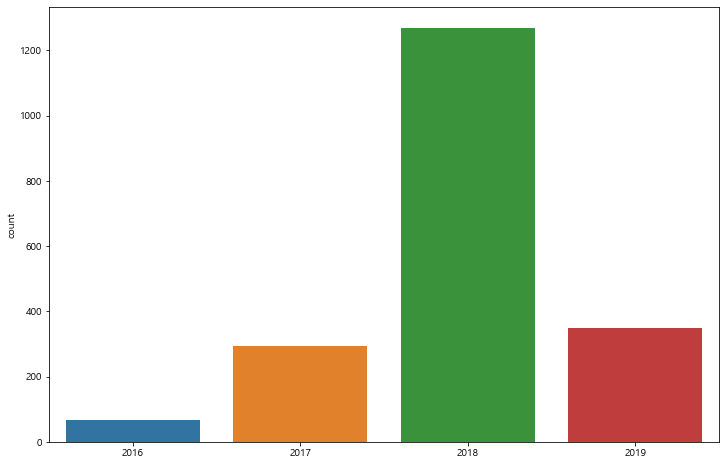

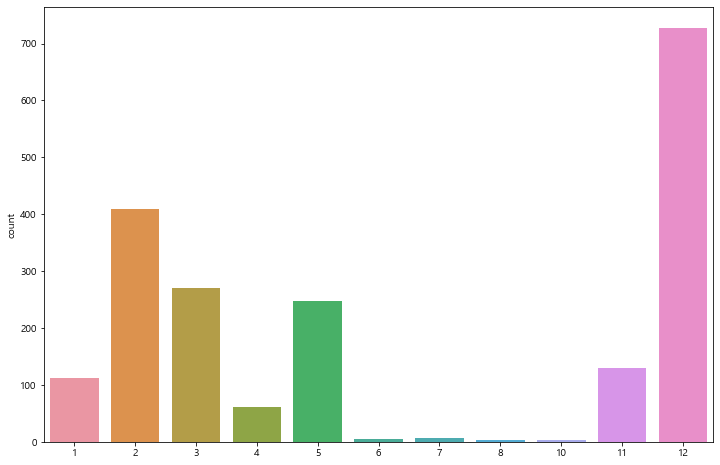

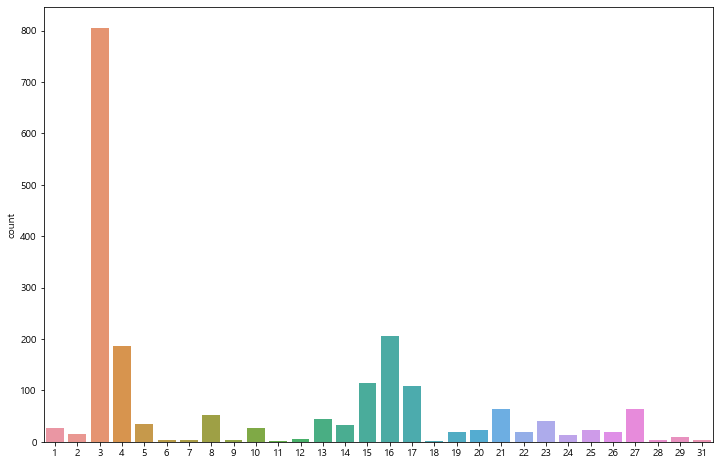

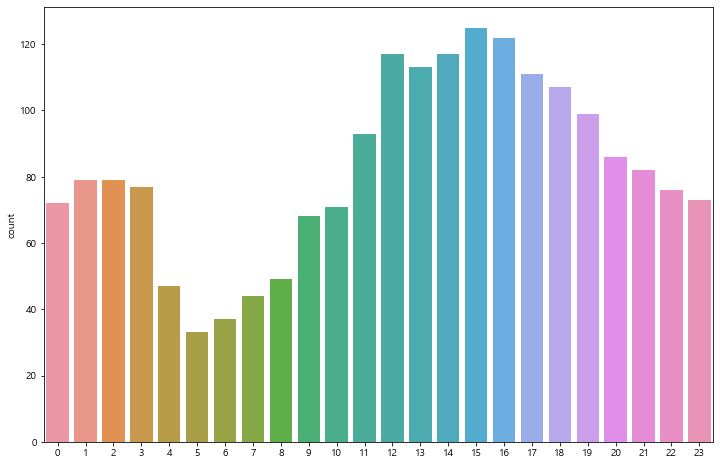

In [14]:
# 날짜별 EDA

test = plant_24.iloc[:,:7]
test['today'] = test['today'].astype('datetime64')

years = []
months = []
days = []
hours = []
for i in test[test['target'] == 1]['today'] :
    hours.append(i.hour)
    months.append(i.month)
    days.append(i.day)
    years.append(i.year)
    
plt.figure(figsize=(12,8))
sns.countplot(years)
plt.savefig('year.png')

plt.figure(figsize=(12,8))
sns.countplot(months)
plt.savefig('month.png')

plt.figure(figsize=(12,8))
sns.countplot(days)
plt.savefig('day.png')

plt.figure(figsize=(12,8))
sns.countplot(hours)
plt.savefig('hour.png')

# DNN 모델

In [15]:
from keras_tqdm import TQDMNotebookCallback
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Activation, LeakyReLU, BatchNormalization, Dropout

from keras.callbacks import EarlyStopping

from keras.models import load_model
from tensorflow.keras.models import load_model

import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import classification_report, confusion_matrix

Using TensorFlow backend.


## 24h 모델

In [ ]:
x = plant_24.iloc[:,[1,2,3,4,5,7,8]]
y = plant_24.iloc[:,[11,12,13,14,15]]

train_x, test_x, train_y, test_y = train_test_split(x, y, train_size=0.7, shuffle=True, random_state=777)

In [ ]:
print(train_x.shape)
print(train_y.shape)

In [ ]:
# callback 함수

es = EarlyStopping(patience=50)
tqdm = TQDMNotebookCallback()

In [ ]:
# DNN 모델
model = Sequential()

model.add(Dense(units=128, activation='relu',input_dim=7))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=5, activation='relu'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

hist = model.fit(train_x, train_y, epochs=500, batch_size=4096, validation_data=[test_x,test_y], verbose=0, callbacks=[es, tqdm]) 

In [ ]:
model.evaluate(test_x, test_y, batch_size=4096)

In [ ]:
# model.save('24h(2.434).h5')

## 48h 모델

In [ ]:
x = plant_48.iloc[:,[1,2,3,4,5,7,8]]
y = plant_48.iloc[:,[11,12,13,14,15]]

train_x, test_x, train_y, test_y = train_test_split(x, y, train_size=0.7, shuffle=True, random_state=777)

print(train_x.shape)  # (240931, 7)
print(train_y.shape)  # (240931, 5)

In [ ]:
# callback 함수
es = EarlyStopping(patience=30)
tqdm = TQDMNotebookCallback()

model = Sequential()

model.add(Dense(units=256, activation='relu',input_dim=7))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=5, activation='relu'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

hist = model.fit(train_x, train_y, epochs=500, batch_size=2048, validation_data=[test_x,test_y], verbose=0, callbacks=[es, tqdm]) 

In [ ]:
# model.save('48h(2.47).h5')

# 공장환경 예측모델 load

In [ ]:
# 모델 load
model_24 = load_model('24h(2.434).h5')
model_48 = load_model('48h(2.47).h5')

# 결로 예측 모델

In [242]:
condensation_data = plant_24.iloc[:,1:7]
condensation_data = condensation_data.reset_index(drop=True)
condensation_data = condensation_data[['temp_in','hum_in','temp_coil','target']]

# condensation_data.to_csv('condensation_data.csv')

condensation_data['dewpoint'] = dewpoint(condensation_data['temp_in'], condensation_data['hum_in'])
condensation_data['diff'] = condensation_data['temp_in'] - condensation_data['temp_coil']

condensation_data['dew_diff'] = np.where(
    condensation_data['dewpoint']>condensation_data['temp_coil'],
    np.where(condensation_data['dewpoint']<condensation_data['temp_in'],
             1,0),0)

# 전체 데이터셋 x,y 분리
condensation_data_x = condensation_data.iloc[:,[0,1,2,4,5,6]]
condensation_data_y = condensation_data.iloc[:,[3]]

# 결로 1 값이 모두 들어간 데이터 샘플 
nag = condensation_data[condensation_data['target'] == 1]  # 1977
pos_index = random.sample(list(condensation_data[condensation_data['target'] == 0].index), 14023)
pos = condensation_data.iloc[pos_index, :]
condensation_sample = pd.concat([nag,pos])

# 셔플
condensation_sample = condensation_sample.sample(frac=1).reset_index(drop=True)
condensation_sample = condensation_sample.iloc[:,[0,1,2,4,5,6,3]]

# x, y 분리
condensation_sample_x = condensation_sample.iloc[:,[0,1,2,3,4,5]]
condensation_sample_y = condensation_sample.iloc[:,[6]]

In [246]:
# 전체 데이터셋 분리
# 정규화
scaler = MinMaxScaler()
condensation_data_x_n = scaler.fit_transform(condensation_data_x)

# 훈련셋, 검증셋
train_x, test_x, train_y, test_y = train_test_split(condensation_data_x_n, condensation_data_y, test_size=0.3, random_state=77)  

In [243]:
# 샘플링한 데이터셋 분리
# 정규화
scaler = MinMaxScaler()
condensation_sample_x_n = scaler.fit_transform(condensation_sample_x)

# 훈련셋, 검증셋
train_x, test_x, train_y, test_y = train_test_split(condensation_sample_x_n, condensation_sample_y, test_size=0.3, random_state=77)  

In [24]:
# callback 함수

es = EarlyStopping(patience=50)
tqdm = TQDMNotebookCallback()

model = Sequential()

model.add(Dense(units=32, activation='linear', input_dim=6))
model.add(Dense(units=64, activation='linear'))
model.add(Dense(units=64, activation='linear'))
model.add(Dense(units=64, activation='linear'))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

hist = model.fit(train_x, train_y, epochs=1000, batch_size=210, validation_data=[test_x,test_y], verbose=0, callbacks=[es, tqdm]) 

# 검증 
pred_y = model.predict(test_x).reshape(-1,).astype('int')
test_y = np.array(test_y).reshape(-1,)

print(classification_report(test_y, pred_y))
print(confusion_matrix(test_y, pred_y))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



# 의사결정트리 모델

In [ ]:
import mglearn
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [247]:
tree_model = DecisionTreeClassifier(random_state=777, max_depth=6)
tree_model.fit(train_x, train_y)
    
print("훈련 세트 정확도: {:.3f}".format(tree_model.score(train_x, train_y)))
print("테스트 세트 정확도: {:.3f}".format(tree_model.score(test_x, test_y)))
print("특성 중요도:\n{}".format(tree_model.feature_importances_))
print(list(condensation_data_x.columns))

# 검증
print('\n학습 데이터 test셋\n')
pred_y = tree_model.predict(test_x).reshape(-1,).astype('int')
test_y = np.array(test_y).reshape(-1,)

print(classification_report(test_y, pred_y))
print(confusion_matrix(test_y, pred_y))

print('\n전체 데이터셋\n')
pred_y = tree_model.predict(condensation_data_x).reshape(-1,).astype('int')
test__y = np.array(condensation_data_y).reshape(-1,)

print(classification_report(test__y, pred_y))
print(confusion_matrix(test__y, pred_y))

훈련 세트 정확도: 0.998
테스트 세트 정확도: 0.998
특성 중요도:
[2.48497225e-03 2.35393869e-01 7.12091248e-03 4.94058556e-04
 2.16536398e-01 5.37969791e-01]
['temp_in', 'hum_in', 'temp_coil', 'dewpoint', 'diff', 'dew_diff']

학습 데이터 test셋

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    103030
         1.0       0.87      0.74      0.80       608

    accuracy                           1.00    103638
   macro avg       0.94      0.87      0.90    103638
weighted avg       1.00      1.00      1.00    103638

[[102964     66]
 [   159    449]]

전체 데이터셋

              precision    recall  f1-score   support

         0.0       1.00      0.56      0.72    343480
         1.0       0.01      0.99      0.03      1977

    accuracy                           0.57    345457
   macro avg       0.51      0.78      0.37    345457
weighted avg       0.99      0.57      0.72    345457

[[193844 149636]
 [    18   1959]]


# 랜덤포레스트 모델

In [248]:
tree_model = RandomForestClassifier(n_estimators=70, max_leaf_nodes=32, random_state=777)
tree_model.fit(train_x, train_y)

print("훈련 세트 정확도: {:.3f}".format(tree_model.score(train_x, train_y)))
print("테스트 세트 정확도: {:.3f}".format(tree_model.score(test_x, test_y)))
print("특성 중요도:\n{}".format(tree_model.feature_importances_))
print(list(condensation_data_x.columns))
print('\n\n')

# 검증
print('\n학습 데이터의 test셋\n')
pred_y = tree_model.predict(test_x).reshape(-1,).astype('int')
test_y = np.array(test_y).reshape(-1,)

print(classification_report(test_y, pred_y))
print(confusion_matrix(test_y, pred_y))

print('\n전체 데이터셋\n')
pred_y = tree_model.predict(condensation_data_x).reshape(-1,).astype('int')
test__y = np.array(condensation_data_y).reshape(-1,)

print(classification_report(test__y, pred_y))
print(confusion_matrix(test__y, pred_y))

훈련 세트 정확도: 0.998
테스트 세트 정확도: 0.997
특성 중요도:
[0.03011566 0.35739693 0.05658489 0.05460007 0.13610723 0.36519522]
['temp_in', 'hum_in', 'temp_coil', 'dewpoint', 'diff', 'dew_diff']




학습 데이터의 test셋

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    103030
         1.0       0.89      0.64      0.75       608

    accuracy                           1.00    103638
   macro avg       0.95      0.82      0.87    103638
weighted avg       1.00      1.00      1.00    103638

[[102984     46]
 [   218    390]]

전체 데이터셋

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99    343480
         1.0       0.18      0.46      0.26      1977

    accuracy                           0.98    345457
   macro avg       0.59      0.72      0.63    345457
weighted avg       0.99      0.98      0.99    345457

[[339315   4165]
 [  1068    909]]


# PCA 이용 랜덤포레스트

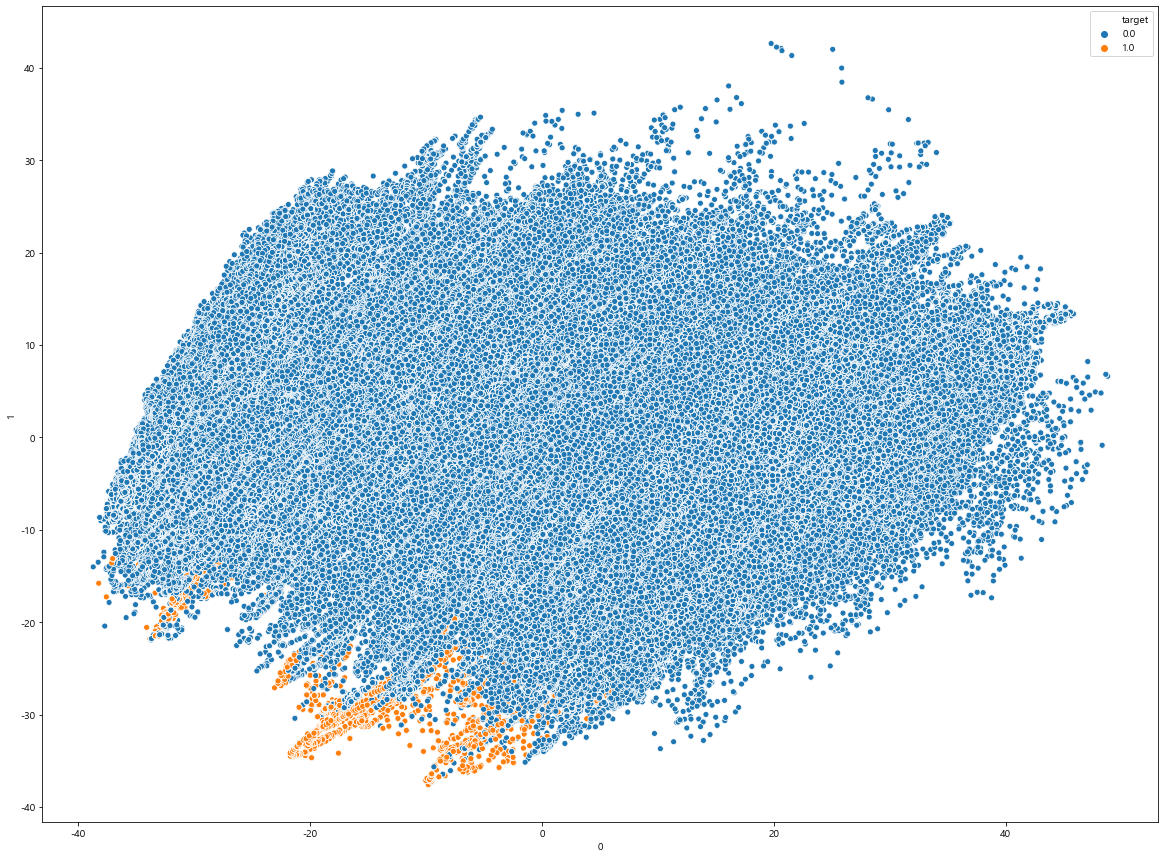

In [205]:
plt.figure(figsize=(20,15))

pca = PCA(n_components = 2)
train_X2D = pca.fit_transform(condensation_data_x)
pca_df = pd.concat([pd.DataFrame(train_X2D), condensation_data_y], axis=1)

sns.scatterplot(data=pca_df, x=0, y=1, hue='target')

In [253]:
pca = PCA(n_components = 2)
train_X2D = pca.fit_transform(train_x)
train_X2D
test_X2D = pca.fit_transform(test_x)
test_X2D

tree_model = RandomForestClassifier(n_estimators=500, max_leaf_nodes=32, random_state=7)
tree_model.fit(train_X2D, train_y)

print("훈련 세트 정확도: {:.3f}".format(tree_model.score(train_X2D, train_y)))
print("테스트 세트 정확도: {:.3f}".format(tree_model.score(test_X2D, test_y)))
print("특성 중요도:\n{}".format(tree_model.feature_importances_))
print(list(condensation_data_x.columns))
print('\n\n')

pred_y = tree_model.predict(test_X2D).reshape(-1,).astype('int')
test_y = np.array(test_y).reshape(-1,)

print(classification_report(test_y, pred_y))
print(confusion_matrix(test_y, pred_y))

0 

훈련 세트 정확도: 0.997
테스트 세트 정확도: 0.996
특성 중요도:
[0.10650835 0.89349165]
['temp_in', 'hum_in', 'temp_coil', 'dewpoint', 'diff', 'dew_diff']



              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    103030
         1.0       0.82      0.49      0.61       608

    accuracy                           1.00    103638
   macro avg       0.91      0.75      0.81    103638
weighted avg       1.00      1.00      1.00    103638

[[102964     66]
 [   309    299]]


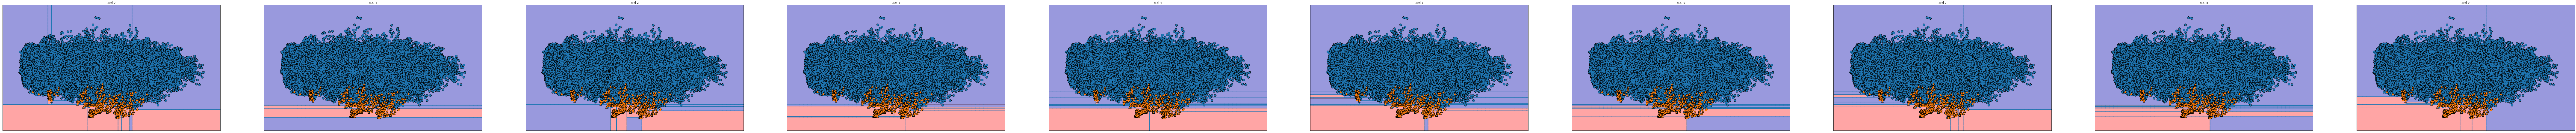

In [254]:
fig, axes = plt.subplots(1, 10, figsize=(200, 10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), tree_model.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(test_X2D, test_y, tree, ax=ax)

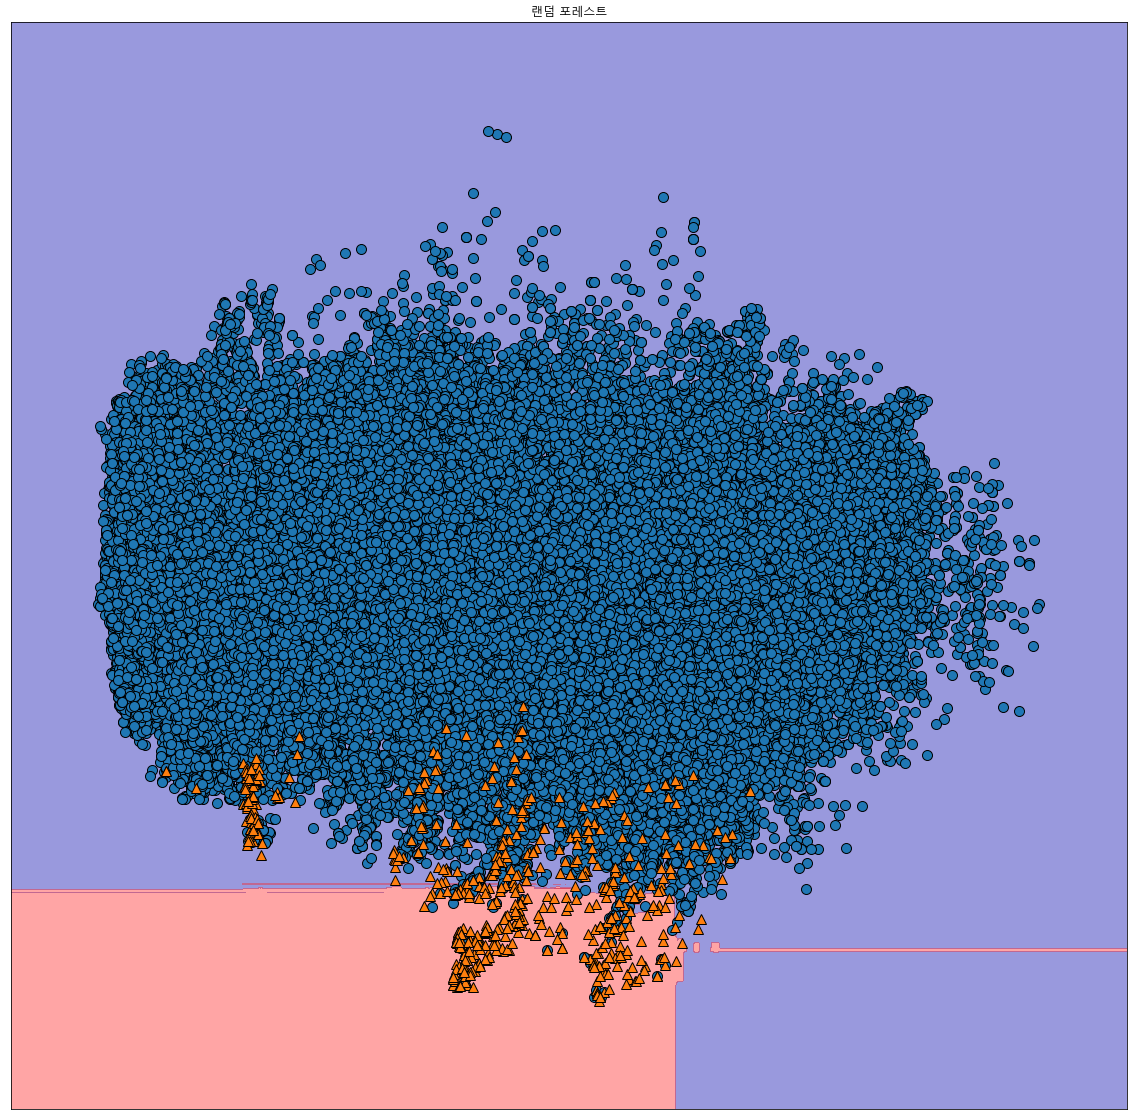

In [255]:
plt.figure(figsize=(20,20))
mglearn.plots.plot_2d_separator(tree_model, test_X2D, fill=True, alpha=.4)
plt.title("랜덤 포레스트")
mglearn.discrete_scatter(test_X2D[:, 0], test_X2D[:, 1], test_y)

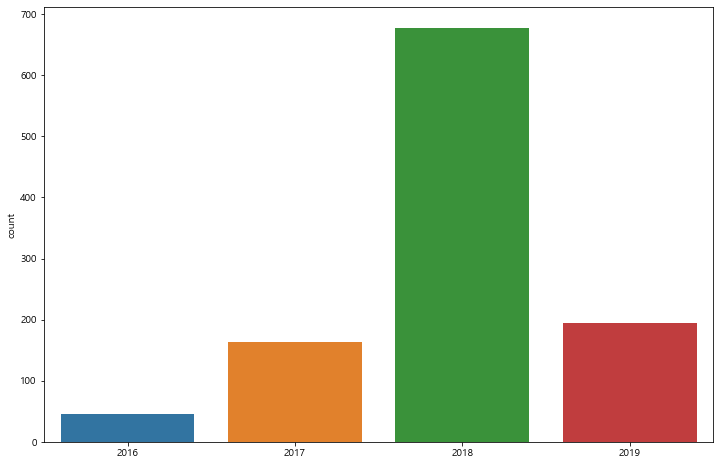

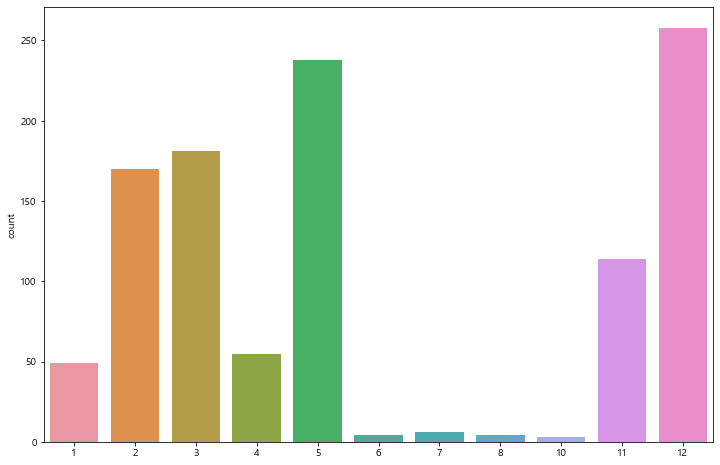

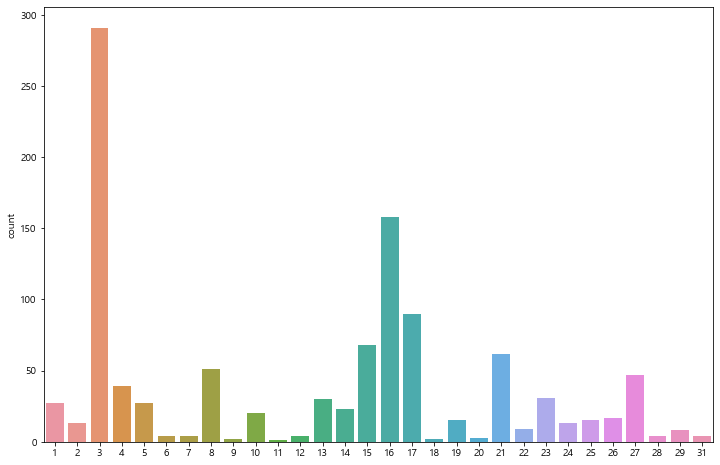

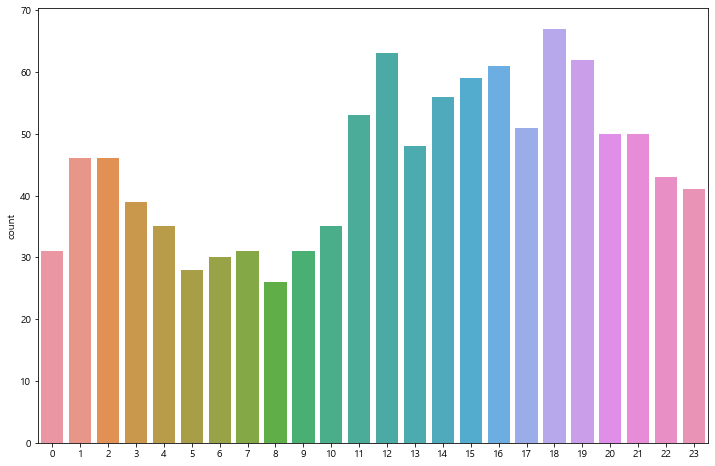

In [122]:
error = condensation_data[condensation_data['dewpoint'] < condensation_data['temp_coil']]
error = error[error['target'] == 1]

error = plant_24.iloc[error.index,:]
error['today'] = error['today'].astype('datetime64')

years = []
months = []
days = []
hours = []
for i in error['today'] :
    hours.append(i.hour)
    months.append(i.month)
    days.append(i.day)
    years.append(i.year)
    
plt.figure(figsize=(12,8))
sns.countplot(years)
# plt.savefig('year.png')

plt.figure(figsize=(12,8))
sns.countplot(months)
# plt.savefig('month.png')

plt.figure(figsize=(12,8))
sns.countplot(days)
# plt.savefig('day.png')

plt.figure(figsize=(12,8))
sns.countplot(hours)
# plt.savefig('hour.png')

In [126]:
error

,today,temp_in,hum_in,temp_coil,temp_out,hum_out,target,temp_24,hum_24,datetime_24,nextday,temp_in_y,hum_in_y,temp_coil_y,temp_out_y,hum_out_y
131,2016-04-06 09:00:00,13.00,84.00,11.00,11.00,45.00,1.0,12.000000,82.000000,2016-04-07 09:00:00,2016-04-07 09:00:00,11.00,72.00,8.00,11.00,80.00
177,2016-04-08 09:00:00,13.00,80.00,10.00,9.00,75.00,1.0,9.400000,79.000000,2016-04-09 09:00:00,2016-04-09 09:00:00,13.00,79.00,9.00,11.00,75.00
182,2016-04-08 12:00:00,13.00,80.00,10.00,12.00,63.00,1.0,14.800000,59.000000,2016-04-09 12:00:00,2016-04-09 12:00:00,14.00,77.00,11.00,12.00,72.00
195,2016-04-09 03:00:00,13.00,77.00,10.00,9.00,80.00,1.0,9.100000,90.000000,2016-04-10 03:00:00,2016-04-10 03:00:00,13.00,56.00,9.00,10.00,84.00
198,2016-04-09 06:00:00,13.00,78.00,10.00,9.00,85.00,1.0,8.100000,89.000000,2016-04-10 06:00:00,2016-04-10 06:00:00,12.00,62.00,9.00,11.00,81.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336966,2019-03-21 03:10:00,12.47,82.39,10.18,9.36,93.19,1.0,0.944444,69.722222,2019-03-22 03:10:00,2019-03-22 03:10:00,8.23,45.18,9.98,3.16,59.86
336971,2019-03-21 03:20:00,12.38,82.26,10.37,9.15,93.25,1.0,0.888889,69.444444,2019-03-22 03:20:00,2019-03-22 03:20:00,8.23,44.99,9.98,3.19,59.37
336972,2019-03-21 03:20:00,12.29,82.88,10.25,9.15,93.25,1.0,0.888889,69.444444,2019-03-22 03:20:00,2019-03-22 03:20:00,7.44,49.82,9.22,3.19,59.37
336975,2019-03-21 03:30:00,12.26,82.75,10.21,9.11,93.41,1.0,0.833333,69.166667,2019-03-22 03:30:00,2019-03-22 03:30:00,7.16,50.49,9.22,3.07,60.20
